In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chisquare, chi2_contingency
import matplotlib.pyplot as plt
import json

In [3]:
data = pd.read_csv("../Datasets/FinalMergedDataset/cleaned_dataset.csv")
data = pd.DataFrame(data)

In [4]:
#Printing all data in the dataset
data

Source      Destination                      Flight Name type  \
0          Paris (CDG)           Mumbai                       Air France    A   
1      Hyderabad (HYD)           Mumbai                           IndiGo    A   
2               Mumbai      Delhi (DEL)                            GoAir    D   
3               Mumbai      Delhi (DEL)                          AirAsia    D   
4               Mumbai    Bangkok (BKK)  Bangkok Airways (Guilin Livery)    D   
...                ...              ...                              ...  ...   
25550           Mumbai    Chennai (MAA)                           IndiGo    D   
25551    Colombo (CMB)           Mumbai                        Air India    A   
25552  Ahmedabad (AMD)           Mumbai                         SpiceJet    A   
25553  Ahmedabad (AMD)           Mumbai                         SpiceJet    A   
25554           Mumbai  Ahmedabad (AMD)                         SpiceJet    D   

       Status                 Time          Actual_Time  Delay  
0           0  2020-02-02 00:05:00  2020-02-02 00:48:00   43.0  
1           0  2020-02-02 00:05:00  2020-02-02 00:23:00   18.0  
2           1  2020-02-02 00:05:00  2020-02-02 00:30:00   25.0  
3           1  2020-02-02 00:05:00  2020-02-02 00:55:00   50.0  
4           1  2020-02-02 00:05:00  2020-02-02 00:50:00   45.0  
...       ...                  ...                  ...    ...  
25550   -9999  2020-03-01 23:55:00                  NaN    0.0  
25551   -9999  2020-03-01 23:58:00                  NaN    0.0  
25552       0  2020-03-01 23:59:00  2020-03-01 23:49:00   10.0  
25553   -9999  2020-03-01 23:59:00                  NaN    0.0  
25554   -9999  2020-03-01 23:59:00                  NaN    0.0  

[25555 rows x 8 columns]

In [5]:
#Printing starting 15 rows in the dataset
data.head(15)

Source      Destination  \
0        Paris (CDG)           Mumbai   
1    Hyderabad (HYD)           Mumbai   
2             Mumbai      Delhi (DEL)   
3             Mumbai      Delhi (DEL)   
4             Mumbai    Bangkok (BKK)   
5       Jaipur (JAI)           Mumbai   
6        Delhi (DEL)           Mumbai   
7             Mumbai   New York (EWR)   
8       London (LHR)           Mumbai   
9        Dubai (DXB)           Mumbai   
10  Coimbatore (CJB)           Mumbai   
11            Mumbai  Bengaluru (BLR)   
12   Bengaluru (BLR)           Mumbai   
13         Goa (GOI)           Mumbai   
14     Chennai (MAA)           Mumbai   

                                       Flight Name type  Status  \
0                                       Air France    A       0   
1                                           IndiGo    A       0   
2                                            GoAir    D       1   
3                                          AirAsia    D       1   
4                  Bangkok Airways (Guilin Livery)    D       1   
5                                            GoAir    A       0   
6                                           IndiGo    A       0   
7                                  United Airlines    D       1   
8   British Airways (GREAT Festival of Creativity)    A       0   
9                                          Vistara    A       0   
10                                          IndiGo    A       0   
11                                          IndiGo    D       1   
12                                           GoAir    A       0   
13                                        SpiceJet    A       0   
14                                          IndiGo    A       0   

                   Time          Actual_Time  Delay  
0   2020-02-02 00:05:00  2020-02-02 00:48:00   43.0  
1   2020-02-02 00:05:00  2020-02-02 00:23:00   18.0  
2   2020-02-02 00:05:00  2020-02-02 00:30:00   25.0  
3   2020-02-02 00:05:00  2020-02-02 00:55:00   50.0  
4   2020-02-02 00:05:00  2020-02-02 00:50:00   45.0  
5   2020-02-02 00:10:00  2020-02-02 00:57:00   47.0  
6   2020-02-02 00:10:00  2020-02-01 23:45:00   25.0  
7   2020-02-02 00:10:00  2020-02-02 01:02:00   52.0  
8   2020-02-02 00:15:00  2020-02-02 01:21:00   66.0  
9   2020-02-02 00:15:00  2020-02-02 00:01:00   14.0  
10  2020-02-02 00:15:00  2020-02-02 00:09:00    6.0  
11  2020-02-02 00:15:00  2020-02-02 00:45:00   30.0  
12  2020-02-02 00:20:00  2020-02-02 00:04:00   16.0  
13  2020-02-02 00:20:00  2020-02-02 01:28:00   68.0  
14  2020-02-02 00:20:00  2020-02-02 01:26:00   66.0

In [6]:
#Description of the dataset
data.describe()

Status         Delay
count  25555.000000  25555.000000
mean    -336.374604     27.387752
std     1804.303189     35.538540
min    -9999.000000      0.000000
25%        0.000000      8.000000
50%        0.000000     20.000000
75%        1.000000     36.000000
max        4.000000   1178.000000

In [7]:
#Printing number of flights per flight company
data["Flight Name"].value_counts()

IndiGo                                            7663
SpiceJet                                          4053
Air India                                         3726
GoAir                                             2599
Vistara                                           2310
                                                  ... 
Air Canada Express                                   1
Air India Express (Ragini Todi-Solah Shringar)       1
Rwandair                                             1
Bangkok Airways                                      1
SalamAir                                             1
Name: Flight Name, Length: 124, dtype: int64

In [8]:
# 5 point summary of delay
Q1, median, Q3 = np.nanpercentile(data["Delay"], [25, 50, 75])
min, max = data["Delay"].min(), data["Delay"].max()

print(
        "1. Minimum Delay = {} \n2. Maximum Delay = {} \n3. Q1 = {}\n4. Median = {}\n5. Q3 = {}".format(
            min, max, Q1, median, Q3
        )
    )

1. Minimum Delay = 0.0 
2. Maximum Delay = 1178.0 
3. Q1 = 8.0
4. Median = 20.0
5. Q3 = 36.0


In [9]:
#Mode of delay calculated
data["Delay"].mode()

0    0.0
dtype: float64

In [10]:
#Mean delay across the entire dataset
data["Delay"].mean()

27.387751907650166

In [11]:
#Standard Deviation of delay across the entire dataset
data["Delay"].std()

35.53853993273401

In [12]:
#Variance of delay
data["Delay"].var()

1262.9878205505302

In [13]:
#Finding coorelation between numerical attributes using the pearson's coefficient
cor = data.corr(method="pearson")
cor

Status     Delay
Status  1.000000  0.143945
Delay   0.143945  1.000000

In [14]:
#Generating a frequency table of the flight status and the flight name
table = pd.crosstab(data["Flight Name"],data["Status"])
table

Status                  -9999  -1      0      1      2      3      4   
Flight Name                                                            
Air Arabia                  6      0     53     52      0      0      0
Air Canada                  9      0     16     15      0      0      0
Air Canada Express          0      0      0      1      0      0      0
Air China                   0      0      1      1      7      0      0
Air France                  0      0     18     17      0      0      0
...                       ...    ...    ...    ...    ...    ...    ...
Virgin Atlantic             0      0     19     20      0      0      0
Vistara                   110      0   1148   1052      0      0      0
Vistara (Retro Livery)      0      0     31     29      0      0      0
Yemenia                     0      0      0      0      8      0      0
flydubai                    0      0     16     17      0      0      0

[124 rows x 7 columns]

In [15]:
# Chi Squared test to see correlation between Flight Name and Status of the flight
chi, p, df1, expected = chi2_contingency(table)
print("Chi-Squared Value = {0:3f} \n p value = {1:3f} ".format(chi, p))

Chi-Squared Value = 15209.822536 
 p value = 0.000000 


In [16]:
#Grouping data according to Flight Name
flight_data = data.groupby(["Flight Name"])
flight_data.describe()

Status                                              \
                         count         mean          std     min  25%  50%   
Flight Name                                                                  
Air Arabia               111.0  -540.018018  2271.383835 -9999.0  0.0  0.0   
Air Canada                40.0 -2249.400000  4228.802369 -9999.0  0.0  0.0   
Air Canada Express         1.0     1.000000          NaN     1.0  1.0  1.0   
Air China                  9.0     1.666667     0.707107     0.0  2.0  2.0   
Air France                35.0     0.485714     0.507093     0.0  0.0  0.0   
...                        ...          ...          ...     ...  ...  ...   
Virgin Atlantic           39.0     0.512821     0.506370     0.0  0.0  1.0   
Vistara                 2310.0  -475.687446  2129.938556 -9999.0  0.0  0.0   
Vistara (Retro Livery)    60.0     0.483333     0.503939     0.0  0.0  0.0   
Yemenia                    8.0     2.000000     0.000000     2.0  2.0  2.0   
flydubai                  33.0     0.515152     0.507519     0.0  0.0  1.0   

                                   Delay                                \
                        75%  max   count        mean        std    min   
Flight Name                                                              
Air Arabia              1.0  1.0   111.0   25.900901  29.056670    0.0   
Air Canada              1.0  1.0    40.0   32.350000  33.944563    0.0   
Air Canada Express      1.0  1.0     1.0  155.000000        NaN  155.0   
Air China               2.0  2.0     9.0    3.111111   6.173420    0.0   
Air France              1.0  1.0    35.0   23.342857  13.766846    1.0   
...                     ...  ...     ...         ...        ...    ...   
Virgin Atlantic         1.0  1.0    39.0   23.871795  18.678977    1.0   
Vistara                 1.0  1.0  2310.0   23.989177  22.750580    0.0   
Vistara (Retro Livery)  1.0  1.0    60.0   21.116667  17.398706    0.0   
Yemenia                 2.0  2.0     8.0    0.000000   0.000000    0.0   
flydubai                1.0  1.0    33.0   19.515152  20.802826    1.0   

                                                     
                           25%    50%    75%    max  
Flight Name                                          
Air Arabia                8.00   19.0   37.5  194.0  
Air Canada                4.00   22.5   48.5  124.0  
Air Canada Express      155.00  155.0  155.0  155.0  
Air China                 0.00    0.0    0.0   14.0  
Air France               13.00   21.0   30.5   63.0  
...                        ...    ...    ...    ...  
Virgin Atlantic          11.00   19.0   31.5   65.0  
Vistara                   8.00   18.0   34.0  238.0  
Vistara (Retro Livery)    7.75   16.0   30.0   74.0  
Yemenia                   0.00    0.0    0.0    0.0  
flydubai                  5.00   18.0   25.0  101.0  

[124 rows x 16 columns]

In [17]:
#Describing delay of the grouped data
flight_data["Delay"].describe()

count        mean        std    min     25%    50%  \
Flight Name                                                                   
Air Arabia               111.0   25.900901  29.056670    0.0    8.00   19.0   
Air Canada                40.0   32.350000  33.944563    0.0    4.00   22.5   
Air Canada Express         1.0  155.000000        NaN  155.0  155.00  155.0   
Air China                  9.0    3.111111   6.173420    0.0    0.00    0.0   
Air France                35.0   23.342857  13.766846    1.0   13.00   21.0   
...                        ...         ...        ...    ...     ...    ...   
Virgin Atlantic           39.0   23.871795  18.678977    1.0   11.00   19.0   
Vistara                 2310.0   23.989177  22.750580    0.0    8.00   18.0   
Vistara (Retro Livery)    60.0   21.116667  17.398706    0.0    7.75   16.0   
Yemenia                    8.0    0.000000   0.000000    0.0    0.00    0.0   
flydubai                  33.0   19.515152  20.802826    1.0    5.00   18.0   

                          75%    max  
Flight Name                           
Air Arabia               37.5  194.0  
Air Canada               48.5  124.0  
Air Canada Express      155.0  155.0  
Air China                 0.0   14.0  
Air France               30.5   63.0  
...                       ...    ...  
Virgin Atlantic          31.5   65.0  
Vistara                  34.0  238.0  
Vistara (Retro Livery)   30.0   74.0  
Yemenia                   0.0    0.0  
flydubai                 25.0  101.0  

[124 rows x 8 columns]

In [18]:
#Finding Standard Deviation of delay of the grouped data
flight_data["Delay"].std().reset_index()

Flight Name      Delay
0                Air Arabia  29.056670
1                Air Canada  33.944563
2        Air Canada Express        NaN
3                 Air China   6.173420
4                Air France  13.766846
..                      ...        ...
119         Virgin Atlantic  18.678977
120                 Vistara  22.750580
121  Vistara (Retro Livery)  17.398706
122                 Yemenia   0.000000
123                flydubai  20.802826

[124 rows x 2 columns]

In [19]:
#Finding Aggregated Mean of the grouped data
flight_data["Delay"].aggregate(np.mean).reset_index()

Flight Name       Delay
0                Air Arabia   25.900901
1                Air Canada   32.350000
2        Air Canada Express  155.000000
3                 Air China    3.111111
4                Air France   23.342857
..                      ...         ...
119         Virgin Atlantic   23.871795
120                 Vistara   23.989177
121  Vistara (Retro Livery)   21.116667
122                 Yemenia    0.000000
123                flydubai   19.515152

[124 rows x 2 columns]

In [20]:
#Finding total null values in the entire dataset
data.isnull().sum()

Source            0
Destination       0
Flight Name       0
type              0
Status            0
Time              0
Actual_Time    1585
Delay             0
dtype: int64

In [21]:
###
###
###

In [22]:
#Data Visualisation

In [23]:
#Box plot of Delay for arrival and departure 
data = pd.read_csv("../Datasets/FinalMergedDataset/cleaned_dataset.csv")

delay_data = pd.DataFrame(data[["Delay","type"]])

In [24]:
arrival = delay_data[delay_data["type"] == "A"]
departure = delay_data[delay_data["type"] == "D"]

In [25]:
arrival = arrival[arrival["Delay"] <= 400 ]
departure = departure[departure["Delay"] <= 400 ]

In [26]:
import plotly.graph_objects as go
import json
import numpy as np

fig = go.Figure()
fig.add_trace(go.Box(y=arrival["Delay"]))
fig.add_trace(go.Box(y=departure["Delay"]))

fig.show()

In [46]:
location_data = data[["Source","Destination"]]
location_data

Source      Destination
0          Paris (CDG)           Mumbai
1      Hyderabad (HYD)           Mumbai
2               Mumbai      Delhi (DEL)
3               Mumbai      Delhi (DEL)
4               Mumbai    Bangkok (BKK)
...                ...              ...
25550           Mumbai    Chennai (MAA)
25551    Colombo (CMB)           Mumbai
25552  Ahmedabad (AMD)           Mumbai
25553  Ahmedabad (AMD)           Mumbai
25554           Mumbai  Ahmedabad (AMD)

[25555 rows x 2 columns]

In [47]:
with open("../Resources/coords.json", "r") as json_file:
    unique_location = json.load(json_file)


def source_lat(data):
    if data in unique_location.keys():
        return unique_location[data]["latitude"]
    else:
        return np.nan


def source_long(data):
    if data in unique_location.keys():
        return unique_location[data]["longitude"]
    else:
        return np.nan


def des_lat(data):
    if data in unique_location.keys():
        return unique_location[data]["latitude"]
    else:
        return np.nan


def des_long(data):
    if data in unique_location.keys():
        return unique_location[data]["longitude"]
    else:
        return np.nan


location_data["source_lat"] = location_data["Source"].apply(source_lat, 1)
location_data["source_long"] = location_data["Source"].apply(source_long, 1)
location_data["des_lat"] = location_data["Destination"].apply(des_lat, 1)
location_data["des_long"] = location_data["Destination"].apply(des_long, 1)

airport_data = location_data.groupby(
    ["Source", "Destination", "source_lat", "source_long", "des_lat", "des_long"]).size()
airport_data = airport_data.reset_index()
airport_data.columns = ("Source", "Destination", "source_lat",
                        "source_long", "des_lat", "des_long", "count")

In [48]:
#Plotting Airplane Traffic on a geogrpahical map
import random

fig = go.Figure()
fig.add_trace(go.Scattergeo(
    lon=airport_data["source_long"],
    lat=airport_data["source_lat"],
    hoverinfo="text",
    text=airport_data["Source"],
    mode="markers",
    marker=dict(
        size=10,
        color="rgb(255,0,0)",
        line=dict(
            width=3,
            color="rgba(68,68,68,0)"
        )
    )
))
fig.add_trace(go.Scattergeo(
    lon=airport_data["des_long"],
    lat=airport_data["des_lat"],
    hoverinfo="text",
    text=airport_data["Destination"],
    mode="markers",
    marker=dict(
        size=10,
        color="rgb(52,55,235)",
        line=dict(
            width=3,
            color="rgba(68,68,68,0)"
        )
    )
))
# fig.show()

for i in range(len(airport_data)):
    fig.add_trace(
        go.Scattergeo(
            lon=[airport_data["source_long"][i], airport_data["des_long"][i]],
            lat=[airport_data["source_lat"][i], airport_data["des_lat"][i]],
            mode="lines",
            line=dict(width=1, color="rgb({},{},{})".format(random.randint(
                0, 255), random.randint(0, 255), random.randint(0, 255))),
            # opacity = float(airport_data["count"][i])/float(airport_data["count"].max())
        )
    )
    

fig.show()

In [49]:
import calendar
import datetime

def get_day(value):
    value = datetime.datetime.strptime(value, "%Y-%m-%d %H:%M:%S")
    return calendar.day_name[value.date().weekday()]

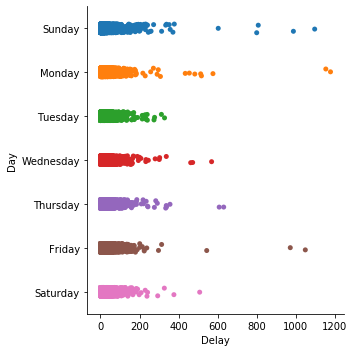

In [50]:
#Plotting delay data points per day of the week

delay_data = pd.DataFrame(
    data[
        [
            "Time",
            "Delay"
        ]
    ]
)

delay_data["Day"] = data["Time"].apply(get_day, 1)

sns.catplot(y="Day", x="Delay", data=delay_data)
plt.show()


In [51]:
#Plotting per airline company number of flights 
import plotly.express as px

dataframe = pd.DataFrame(data[["Flight Name"]])
dataframe = dataframe.groupby(dataframe["Flight Name"]).size().reset_index()
dataframe.columns = ("Flight Name", "Count")

fig = px.pie(dataframe, values=dataframe["Count"], names=dataframe['Flight Name'],
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [53]:
#Plotting per airline day wise average delay
delay_data = pd.DataFrame(data[
    [
        "Flight Name",
        "Time",
        "Delay"
    ]
])
delay_data["Day"] = delay_data["Time"].apply(get_day, 1)

delay_data = delay_data.groupby(["Flight Name", "Day"])["Delay"].mean().reset_index()
delay_data = delay_data.sort_values(by=["Day"])

fig=go.Figure()
fig = px.line(delay_data, x="Day", y="Delay", color="Flight Name")
fig.show()